# Libraries and versions

In [5]:
python_version = !python -V #version 3.8.8
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.4
from datetime import date as dt
from IPython.display import Image

#para modelar a base
from sklearn import __version__ as skl #version0.24.1
from sklearn.preprocessing import PolynomialFeatures

In [6]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')
print(f'Sklearn version - {skl}')

Python version - 3.8.8
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.1
Matplotlib version - 3.3.4
Sklearn version - 0.24.1


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

## Seaborn

In [4]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [13]:
import warnings
warnings.filterwarnings("ignore")

# Base

In [7]:
bvsp = pd.read_csv('bvsp_novo.csv')
bvsp.head()

,date,open,high,low,close
0,1993-04-27,24.799999,25.400000,24.500000,24.500000
1,1993-04-28,24.500000,24.600000,23.700001,24.299999
2,1993-04-29,24.299999,24.799999,23.700001,23.700001
3,1993-04-30,23.700001,24.200001,23.700001,24.100000
4,1993-05-03,24.100000,24.400000,23.799999,24.100000


## Tratamento

- traduzir nomes das colunas

In [8]:
colunas = {
    'date':'data',
    'open':'abertura',
    'close':'fechamento',
    'low':'baixa',
    'high':'alta'
}

bvsp.rename(columns=colunas, inplace=True)
bvsp.columns

Index(['data', 'abertura', 'alta', 'baixa', 'fechamento'], dtype='object')

- transformar variável data em datetime

In [9]:
bvsp['data'] = pd.to_datetime(bvsp['data'])
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        7116 non-null   datetime64[ns]
 1   abertura    7116 non-null   float64       
 2   alta        7116 non-null   float64       
 3   baixa       7116 non-null   float64       
 4   fechamento  7116 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 278.1 KB


## Modelagem dos dados

como o objetivo é prever os resultados de baixa, alta e fechamento, tendo por base a abertura, focarei a modelagem na variável dependente

### Variação da variável dependente

#### Variação absoluta

In [10]:
bvsp['var_abertura'] = bvsp['abertura'].diff()
bvsp.head()

,data,abertura,alta,baixa,fechamento,var_abertura
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,NaN
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,-0.299999
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,-0.200001
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,-0.599998
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,0.399999


### Estatísticas móveis

In [11]:
bvsp['media_movel_5'] = bvsp['abertura'].rolling(5).mean()
bvsp['media_movel_10'] = bvsp['abertura'].rolling(10).mean()
bvsp['media_movel_15'] = bvsp['abertura'].rolling(15).mean()
bvsp['media_movel_30'] = bvsp['abertura'].rolling(30).mean()
bvsp.head(40)

,data,abertura,alta,baixa,fechamento,var_abertura,media_movel_5,media_movel_10,media_movel_15,media_movel_30
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,NaN,NaN,NaN,NaN,NaN
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,-0.299999,NaN,NaN,NaN,NaN
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,-0.200001,NaN,NaN,NaN,NaN
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,-0.599998,NaN,NaN,NaN,NaN
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,0.399999,24.280000,NaN,NaN,NaN
5,1993-05-04,24.100000,25.000000,24.100000,24.900000,0.000000,24.140000,NaN,NaN,NaN
6,1993-05-05,24.900000,24.900000,24.299999,24.600000,0.800000,24.220000,NaN,NaN,NaN
7,1993-05-06,24.600000,25.700001,24.600000,25.600000,-0.300000,24.280000,NaN,NaN,NaN
8,1993-05-07,25.600000,26.100000,25.500000,25.799999,1.000000,24.660000,NaN,NaN,NaN
9,1993-05-10,25.799999,25.799999,25.100000,25.200001,0.199999,25.000000,24.640000,NaN,NaN


## Análise gráfica das variáveis

<AxesSubplot:xlabel='media_movel_30', ylabel='Density'>

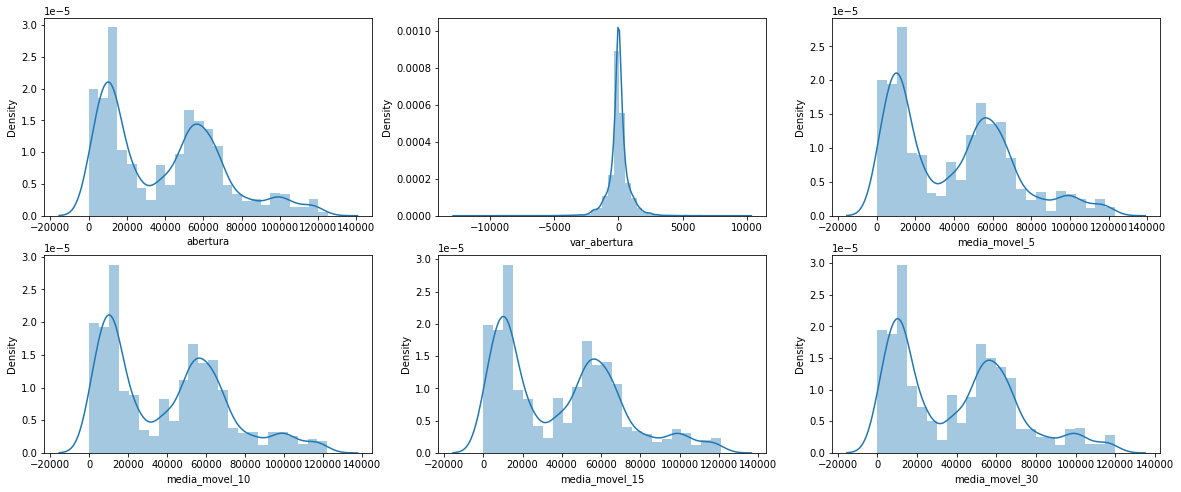

In [14]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,8))

sns.distplot(bvsp['abertura'], ax=axes[0,0])
sns.distplot(bvsp['var_abertura'], ax=axes[0,1])
sns.distplot(bvsp['media_movel_5'], ax=axes[0,2])
sns.distplot(bvsp['media_movel_10'], ax=axes[1,0])
sns.distplot(bvsp['media_movel_15'], ax=axes[1,1])
sns.distplot(bvsp['media_movel_30'], ax=axes[1,2])

<AxesSubplot:xlabel='media_movel_30'>

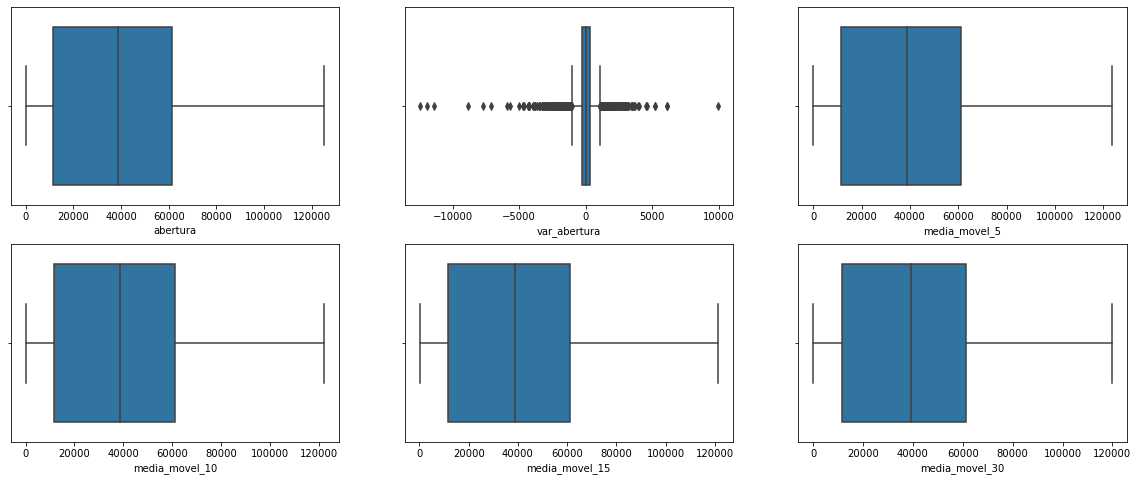

In [15]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,8))

sns.boxplot(bvsp['abertura'], ax=axes[0,0])
sns.boxplot(bvsp['var_abertura'], ax=axes[0,1])
sns.boxplot(bvsp['media_movel_5'], ax=axes[0,2])
sns.boxplot(bvsp['media_movel_10'], ax=axes[1,0])
sns.boxplot(bvsp['media_movel_15'], ax=axes[1,1])
sns.boxplot(bvsp['media_movel_30'], ax=axes[1,2])

<AxesSubplot:xlabel='data', ylabel='media_movel_30'>

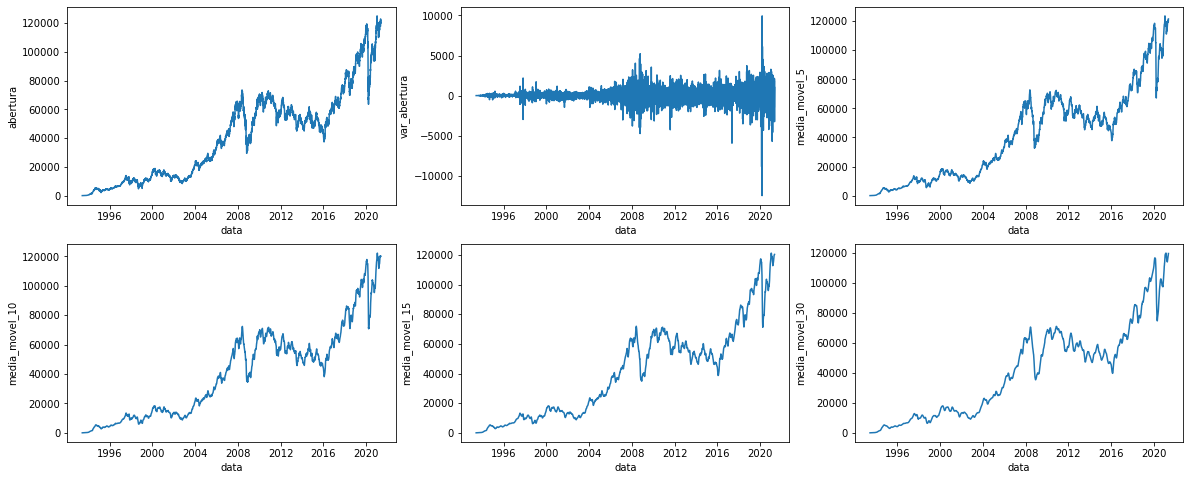

In [16]:
base = bvsp.dropna()

fig, axes = plt.pyplot.subplots(2,3, figsize=(20,8))

sns.lineplot(data=base, x='data', y='abertura', ax=axes[0,0])
sns.lineplot(data=base, x='data', y='var_abertura', ax=axes[0,1])
sns.lineplot(data=base, x='data', y='media_movel_5', ax=axes[0,2])
sns.lineplot(data=base, x='data', y='media_movel_10', ax=axes[1,0])
sns.lineplot(data=base, x='data', y='media_movel_15', ax=axes[1,1])
sns.lineplot(data=base, x='data', y='media_movel_30', ax=axes[1,2])

- analisando os gráficos é possível afirmar que não há estacionaridade se utilizar períodos de médias móveis de até 30 dias

**criar novas variáveis com médias móveis mais amplas: 180, 240, 360 e 480 dias**

### Estatísticas móveis

In [17]:
bvsp['media_movel_180'] = bvsp['abertura'].rolling(180).mean()
bvsp['media_movel_240'] = bvsp['abertura'].rolling(240).mean()
bvsp['media_movel_360'] = bvsp['abertura'].rolling(360).mean()
bvsp['media_movel_480'] = bvsp['abertura'].rolling(480).mean()

In [18]:
bvsp.describe()

,abertura,alta,baixa,fechamento,var_abertura,media_movel_5,media_movel_10,media_movel_15,media_movel_30,media_movel_180,media_movel_240,media_movel_360,media_movel_480
count,7116.000000,7116.000000,7116.000000,7116.000000,7115.000000,7112.000000,7107.000000,7102.000000,7087.000000,6937.000000,6877.000000,6757.000000,6637.000000
mean,39932.887648,40359.873707,39505.528569,39946.098244,16.963345,39921.317674,39906.902886,39892.779913,39850.326315,39477.409892,39362.344232,39180.976654,38945.233450
std,30473.838132,30753.676743,30208.277661,30491.132172,835.992845,30436.229872,30391.340250,30346.900125,30210.210614,28964.749193,28560.184465,27892.217503,27137.343452
min,23.700001,24.200001,23.700001,23.700001,-12482.000000,24.140000,24.640000,25.320000,30.050000,131.741111,329.520835,1265.447223,2057.587711
25%,11509.750000,11648.000000,11363.000000,11508.500000,-242.000000,11505.350000,11515.800000,11529.966667,11509.500000,11538.983333,11699.608333,11922.819444,12458.231250
50%,38899.000000,39449.000000,38342.500000,38910.000000,3.200005,38856.300000,38792.000000,38989.866667,39330.733333,41763.783333,43192.254167,44061.225000,45611.889583
75%,61180.250000,61902.000000,60573.250000,61174.750000,299.000000,61266.900000,61306.600000,61269.333333,61079.883333,59662.088889,59440.562500,58517.602778,57029.912500
max,125075.000000,125324.000000,123227.000000,125077.000000,9944.000000,123549.000000,122200.600000,121183.666667,119775.133333,110755.866667,107520.233333,104247.597222,103965.470833


### Análise gráfica

<AxesSubplot:xlabel='media_movel_480', ylabel='Density'>

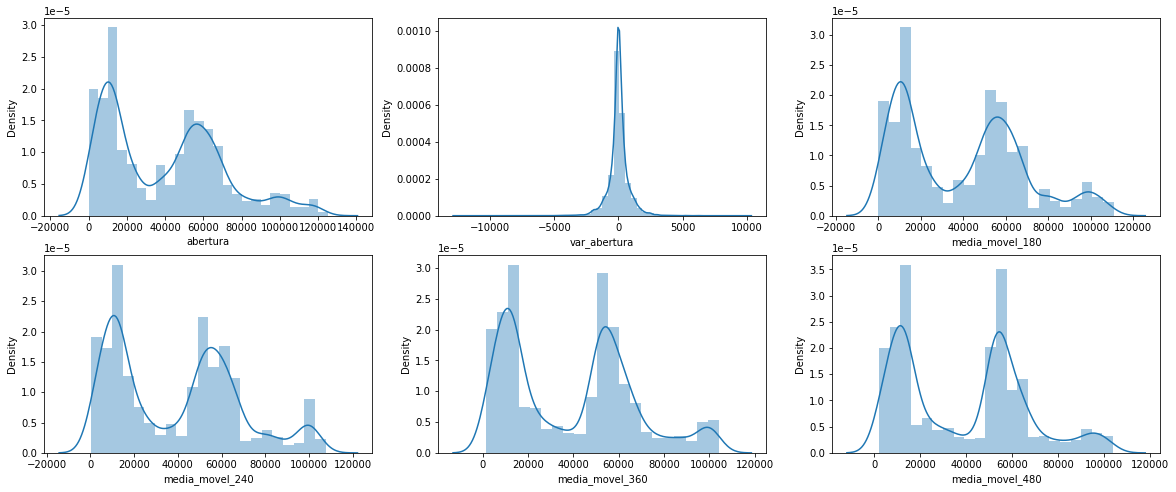

In [19]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,8))

sns.distplot(bvsp['abertura'], ax=axes[0,0])
sns.distplot(bvsp['var_abertura'], ax=axes[0,1])
sns.distplot(bvsp['media_movel_180'], ax=axes[0,2])
sns.distplot(bvsp['media_movel_240'], ax=axes[1,0])
sns.distplot(bvsp['media_movel_360'], ax=axes[1,1])
sns.distplot(bvsp['media_movel_480'], ax=axes[1,2])

<AxesSubplot:xlabel='media_movel_480'>

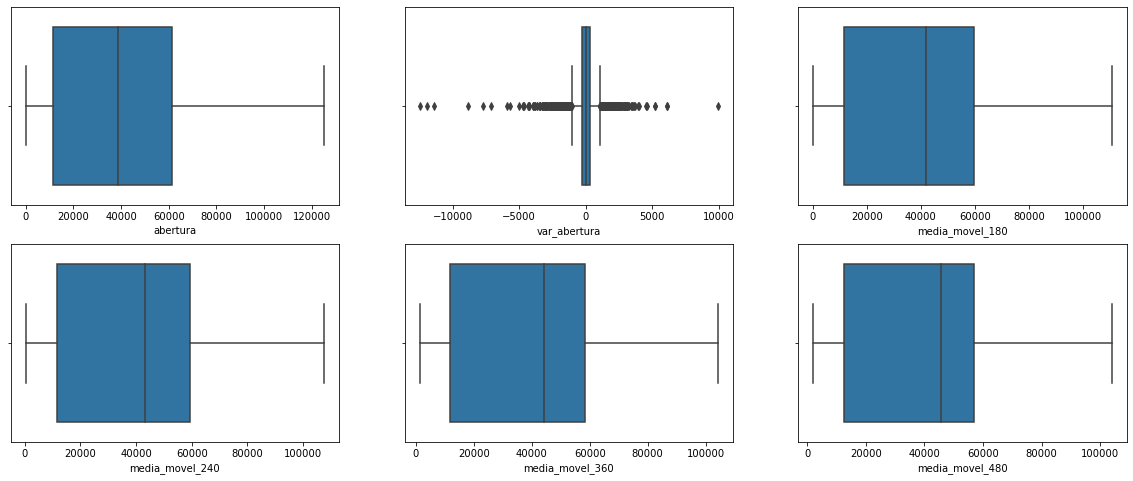

In [20]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,8))

sns.boxplot(bvsp['abertura'], ax=axes[0,0])
sns.boxplot(bvsp['var_abertura'], ax=axes[0,1])
sns.boxplot(bvsp['media_movel_180'], ax=axes[0,2])
sns.boxplot(bvsp['media_movel_240'], ax=axes[1,0])
sns.boxplot(bvsp['media_movel_360'], ax=axes[1,1])
sns.boxplot(bvsp['media_movel_480'], ax=axes[1,2])

<AxesSubplot:xlabel='data', ylabel='media_movel_480'>

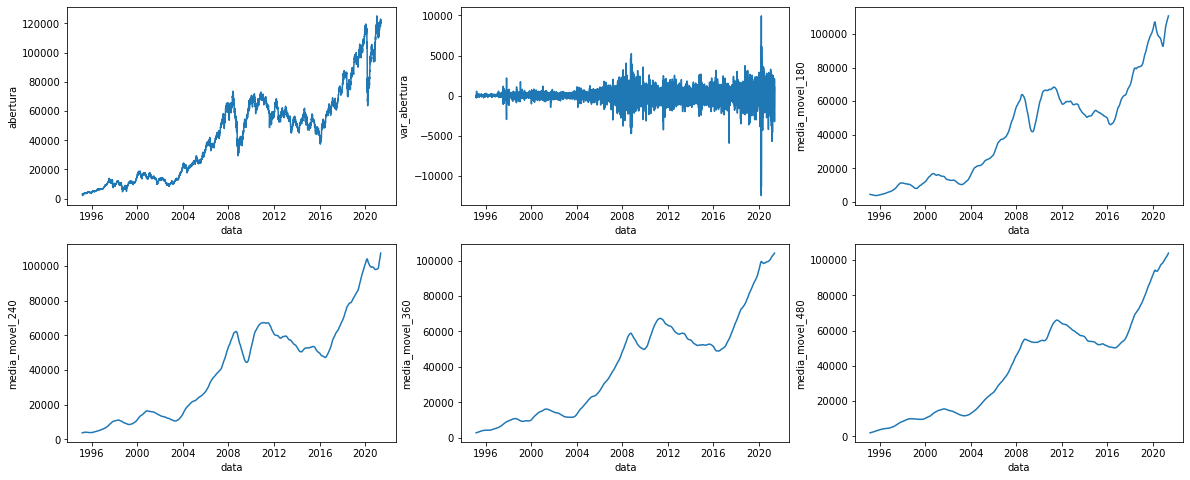

In [21]:
base = bvsp.dropna()

fig, axes = plt.pyplot.subplots(2,3, figsize=(20,8))

sns.lineplot(data=base, x='data', y='abertura', ax=axes[0,0])
sns.lineplot(data=base, x='data', y='var_abertura', ax=axes[0,1])
sns.lineplot(data=base, x='data', y='media_movel_180', ax=axes[0,2])
sns.lineplot(data=base, x='data', y='media_movel_240', ax=axes[1,0])
sns.lineplot(data=base, x='data', y='media_movel_360', ax=axes[1,1])
sns.lineplot(data=base, x='data', y='media_movel_480', ax=axes[1,2])

### Observações

Com uma média móvel que considere um período maior de tempo é possível construir uma variável com estacionaridade, facilitando o entendimento da regressão.

- excluirei as variáveis com médias móveis menores de 180 dias
- excluirei da base os valores missing

In [22]:
bvsp.drop(columns=['media_movel_5', 'media_movel_10', 'media_movel_15', 'media_movel_30'], inplace=True)
bvsp.dropna(inplace=True)
bvsp.reset_index(inplace=True, drop=True)
bvsp.head()

,data,abertura,alta,baixa,fechamento,var_abertura,media_movel_180,media_movel_240,media_movel_360,media_movel_480
0,1995-02-27,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.944448,3785.654587,2719.633892,2057.587711
1,1995-02-28,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.830560,3792.938337,2728.090837,2064.238961
2,1995-03-01,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.943892,3800.340836,2736.526114,2070.890836
3,1995-03-02,3270.899902,3270.899902,2970.199951,2989.100098,53.500000,4405.345558,3807.966252,2745.099169,2077.654585
4,1995-03-03,2989.100098,3018.100098,2841.699951,2988.000000,-281.799804,4404.507225,3814.417502,2752.882781,2083.832502


## Novo período de dados

In [20]:
inicial = bvsp.iloc[0]['data']
final = bvsp.iloc[-1]['data']
print(f'Período de dados para o modelo\nInicial - {inicial}\nFinal - {final}')

Período de dados para o modelo
Inicial - 1995-02-27 00:00:00
Final - 2021-05-14 00:00:00


# Normalização dos dados

### Standar Scaler

In [24]:
#instanciar normalizdor
scaler = StandardScaler()
bvsp_scaler = scaler.fit_transform(bvsp.drop(columns=['data']))
bvsp_scaler = pd.DataFrame(bvsp_normalizado, columns=bvsp.columns[1:])
bvsp_scaler.insert(0, 'data', bvsp['data'])
bvsp_scaler

,data,abertura,alta,baixa,fechamento,var_abertura,media_movel_180,media_movel_240,media_movel_360,media_movel_480
0,1995-02-27,0.343464,0.357171,0.339941,0.349175,0.000000,0.470237,0.404127,0.290327,0.219652
1,1995-02-28,0.343215,0.356912,0.339694,0.348922,0.000000,0.469883,0.404610,0.291018,0.220202
2,1995-03-01,0.342959,0.356646,0.339442,0.348662,0.000000,0.469546,0.405098,0.291701,0.220747
3,1995-03-02,0.354952,0.354952,0.322321,0.324372,0.005806,0.478060,0.413233,0.297893,0.225463
4,1995-03-03,0.332129,0.335351,0.315751,0.332007,-0.031312,0.489400,0.423833,0.305882,0.231542
...,...,...,...,...,...,...,...,...,...,...
6632,2021-05-10,0.376877,0.379144,0.376127,0.376479,0.006535,0.340633,0.330010,0.321467,0.320445
6633,2021-05-11,0.376553,0.379827,0.371120,0.379827,-0.000414,0.341054,0.330619,0.321681,0.320679
6634,2021-05-12,0.380935,0.380935,0.370074,0.370854,0.003284,0.342435,0.332120,0.322752,0.321782
6635,2021-05-13,0.372261,0.377594,0.372261,0.375355,-0.010116,0.344049,0.333853,0.324069,0.323147


<AxesSubplot:xlabel='media_movel_480', ylabel='Density'>

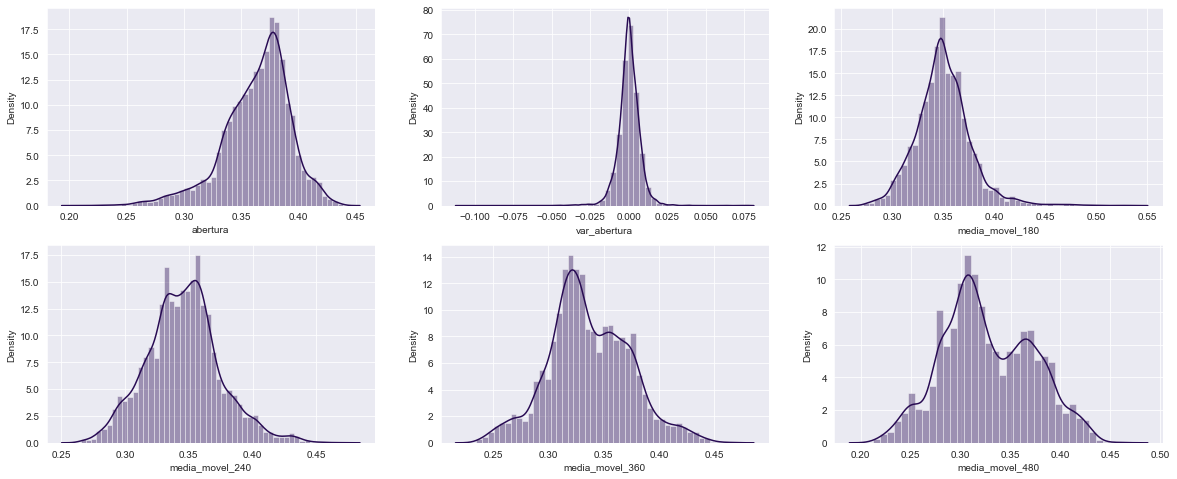

In [26]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,8))

sns.distplot(bvsp_scaler['abertura'], ax=axes[0,0])
sns.distplot(bvsp_scaler['var_abertura'], ax=axes[0,1])
sns.distplot(bvsp_scaler['media_movel_180'], ax=axes[0,2])
sns.distplot(bvsp_scaler['media_movel_240'], ax=axes[1,0])
sns.distplot(bvsp_scaler['media_movel_360'], ax=axes[1,1])
sns.distplot(bvsp_scaler['media_movel_480'], ax=axes[1,2])

In [27]:
inicial = bvsp_scaler.iloc[0]['data']
final = bvsp_scaler.iloc[-1]['data']
print(f'Período de dados para o modelo normalizado\nInicial - {inicial}\nFinal - {final}')

Período de dados para o modelo normalizado
Inicial - 1995-02-27 00:00:00
Final - 2021-05-14 00:00:00


## Salvar dados para aplicar aos modelos

In [29]:
#original
bvsp.to_csv('bvsp_modelado_original.csv', index=False)

#normalizado
bvsp_scaler.to_csv('bvsp_modelado_normalizado.csv', index=False)